# Creating a flask-bsed online message bank 

## Intro

In this blog post, we would be creating a flask-based online message bank deployed as a python web app using the google cloud service and mySQL database.

A web application is a computer program that utilizes web browsers and web technology to perform tasks over the Internet, accessible by users with internet connections (Stackpath). 

The skills you’ll need are:

- Flask fundamentals, including render_template(), the basic anatomy of templates, and user interactions.
- Database skills, including adding items to databases and displaying them.
- Basic CSS (Cascading styling sheets) in order to add a bit of personal flare to your webapp. 

Built With
Flask - Web framework and related modules  
Sqlite3 - Database   
Bootstrap - Styling  
Jinja2 - Template formatting   

Git repo: https://github.com/linnilinnil/message-bank 

## Functionalities Overview

The app you’re going to build is a simple message bank. It should do two things:

1. Allow the user to submit messages to the bank.
2. Allow the user to view a sample of the messages currently stored in the bank.
3. Additionally, you should use CSS to make your app look attractive and interesting.


## Setting up the basics

We first create a .py file called __app.py__ where we would import modules and define the application frame. 

```python
from flask import Flask, render_template,request, redirect, url_for, g
import sqlite3

app = Flask(__name__)

# Code for different pages to be inserted below
# Begin -------
# End ---------

if __name__ == "__main__":
    app.run(port=8000, debug=True)
```

Type __python app.py__ in the terminal to run the flask app. 

Alternatively, without the app.run section, we run the following commands in the terminal:  
(Setting the environmental variables to dev and debug mode will allow you to see updates of the web app without the need to resetart the web app everytime)
```
export FLASK_ENV=development
export FLASK_DEBUG=1
flask run 
```
which will show you the following lines:

```
* Environment: development
 * Debug mode: on
 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)
 * Restarting with fsevents reloader
 * Debugger is active!
 * Debugger PIN: 331-048-817
 ```

 following the link after __Running on__ to check out your 'website'.

Next, we write the separate functions for different pages:
- __\\__: the root directory, we will have this redirected to the "home" page
- __home__: front page of the message bank
- __submit__: page for submitting the message, contains a form, allows post&get
- __view__: page for viewing random messages, contains a form, allows post&get

```python
# @app,route... are decoraters ,i.e., functions wrappers that allow you to execute
# codes before and after it that does not change the func definition
# in this case, it specifies what function would be called to render the page 
# under a specific web directory/route
@app.route("/",  methods=['GET']) 
def index():
    return redirect(url_for('home'))

@app.route("/home/",  methods=['GET', 'POST'])
def home():
    return render_template("home.html")

@app.route("/submit/", methods=['POST', 'GET'])
def submit():
    # if we access the page from another page with differnt url
    if request.method == "GET":
        return render_template("submit.html")
    # if we submit a form on this page and land on the same page again
    else: 
        # the insert_message function updates the messages database
        insert_message(request)
        # pass in the user handle to write a thank you message to the user
        return render_template("submit.html", 
                               name=request.form['name'])

@app.route("/view/",  methods=['GET', 'POST'])
def view():
    # default: gives one message
    if request.method == "GET":
        # pass in the list of messages we retrieve from the database for display
        return render_template('view.html', 
                               messages = random_messages(1))
    else: 
    # add a slider that allows users to change the num. of messages displayed
        return render_template('view.html', 
                               messages = random_messages(int(request.form['n'])))
```

## Enabling submissions  
After defining the functions for different routes, we fill in the functions for updating the message dataset based on user input and the function for displaying random messages. 



```python
# this function is used to retrive the message database 
def get_message_db():
    # g is an object provided by Flask. 
    # It is a global namespace for holding any data you want during a single app context.
    # in this case, we create a message_db variable under g to store the dataset containing user messages
    try:
            # if the db already exists, just return it
            return g.message_db
    except:
            # if not, we establish the database
            g.message_db = sqlite3.connect("messages_db.sqlite")
            cursor = g.message_db.cursor()
            # we create a data table with id (primary key), handle (user name), and message (user message)
            # called messages if it does not exist in messages_db yet
            cmd = """
            CREATE TABLE IF NOT EXISTS messages(
                id INTEGER PRIMARY KEY AUTOINCREMENT,
                handle TEXT NOT NULL,
                message TEXT NOT NULL
            );
            """
            cursor.execute(cmd)
            g.message_db.commit()
            return g.message_db
```

__Note:__ when working directly with SQL commands, it is necessary to run db.commit() after inserting a row into db in order to ensure that your row insertion has been saved.  

You should ensure that the ID number of each message is unique. One way to do this is by setting the ID number of a message equal to one plus the current number of rows in message_db.  Another way to do this is setting it as an autoincremented primary key.

Don’t forget to close the database connection within the function!


We then write the function to update the database.   
```python
# this function inserts user input message to the message_db database
def insert_message(request):
    # establish connection to the database
    db = get_message_db()
    # extract message and handle from the request form
    message = request.form['msg']
    handle = request.form['name']
    # update the database
    cmd = 'INSERT INTO messages (handle, message) VALUES (?, ?)'
    db.execute(cmd,(handle, message))
    # commit changes and close connection
    db.commit()
    db.close()
```

## Viewing Random Submissions 

In this part, we will write a function called random_messages(n) which will return a collection of n random messages from the message_db, or fewer if necessary. 

```python
# fetch n random messages from the database
# if n > # of current rows, n = # of current rows
def random_messages(n):
    # establish connection
    db = get_message_db()
    cursor = g.message_db.cursor()
    # select random messages, fetch both the handle and message
    cmd = 'SELECT handle, message FROM messages ORDER BY RANDOM() LIMIT ?'
    msgs = cursor.execute(cmd,(n,)).fetchall()
    # close connection
    db.close()
    return msgs
```

## Defining html templates

In [5]:
from IPython import display

In this part, we will define the templates for all the pages: home page (home.html), message bank submission page (submit.html), and message bank random viewing page (view.html).

We will first define a base template which styles the pages we would be showing for the web apps, then have the __submit.html__ extends the __base.html__. Both htmls were to be put under a folder called __template__.
Here are more examples about extends from [flask](https://flask.palletsprojects.com/en/2.2.x/tutorial/templates/#register) and [jinja](https://jinja.palletsprojects.com/en/3.1.x/templates/#template-inheritance).

```html
<!DOCTYPE html>
<!--created by marlene lin-->

<html lang="en">
    <head>
        <!-- Required meta tags -->
<meta http-equiv="Content-Type" content="text/html; charset=utf-8">
<meta name="viewport" content="width=device-width, initial-scale=1, shrink-to-fit=no">    
        <!-- Bootstrap CSS and my own -->
        <link href="https://stackpath.bootstrapcdn.com/bootstrap/4.1.3/css/bootstrap.min.css" rel="stylesheet">
        <link href="/static/favicon.ico" rel="icon">
        <link href="/static/styles.css" rel="stylesheet">
         <!-- Block that allows other pages to customize title -->
        <title>Message bank: {% block title %}{% endblock %}</title>
    </head>
    <body>
        <div class="container">
            <div class="row header">
            </div>

            <div class="row">
               <div class="col-md-1 col-lg-1 col-xl-1"></div>
               <div class="col-md-3 col-lg-3 col-xl-3 sidebar">
                <!-- navbar -->
                <ul class="nav flex-column">
                    <li class="nav-item">
                        <p><i><a class="nav-link" href="/home"><b>Welcome: </b></a></i></p>
                    </li>
                    <li class="nav-item">
                        <a class="nav-link" href="/submit">Write a Message</a>
                    </li>
                    <li class="nav-item">
                        <a class="nav-link" href="/view">View messages</a>
                    </li>
                </ul>
                </div>
                <!--the block where the main content is hosted -->
                <div class="col-md-8 col-lg-8 col-xl-8 maininfo">
                {% block main %}{% endblock %}
                </div>
                <div class="col-1"></div>
           </div>

           <div class="row">
               <div class="col footer">
               </div>
           </div>
       </div>
        <script src="https://stackpath.bootstrapcdn.com/bootstrap/4.1.3/js/bootstrap.min.js" integrity="sha384-ChfqqxuZUCnJSK3+MXmPNIyE6ZbWh2IMqE241rYiqJxyMiZ6OW/JmZQ5stwEULTy" crossorigin="anonymous"></script>
    </body>
</html>
```


Next, we will define submit.html which has the following three user interface elements:

- A text box for submitting a message.
- A text box for submitting the name of the user.
- A “submit” button.  

```html
{% extends "base.html" %}
<!-- change title-->
{% block title %}
    Submit
{% endblock %}

{% block main %}	
<!-- define a form that takes in user handle and message-->
<div class="card">
    <div class="card-header">
      <i><b>Kirby would appreciate your messages.</b>
          </div>
    <div class="card-body">
        <form method="post">
            <label for="name">Your name or handle:</label>
            <input name="name" id="name">
            <br>
            <label for="msg">Your message:</label>
            <input name="msg" id="msg">
            <br>
            <br>
            <input type="submit" value="Submit form">
        </form>
    </div>
</div>
  <br>
  <!-- sends a thank you message to the user-->
  <!-- the name argument is passed in to the render_template method when the request type is GET-->
    {% if name %}
    Hello <b>{{name}}</b>:
    <br>
    Thank you for submitting the form. <br>
    You can now view messages by going to <a href="/view">View messages</a> or resubmit another message. 
    {% endif %}
  <br>

  {% endblock %}

```

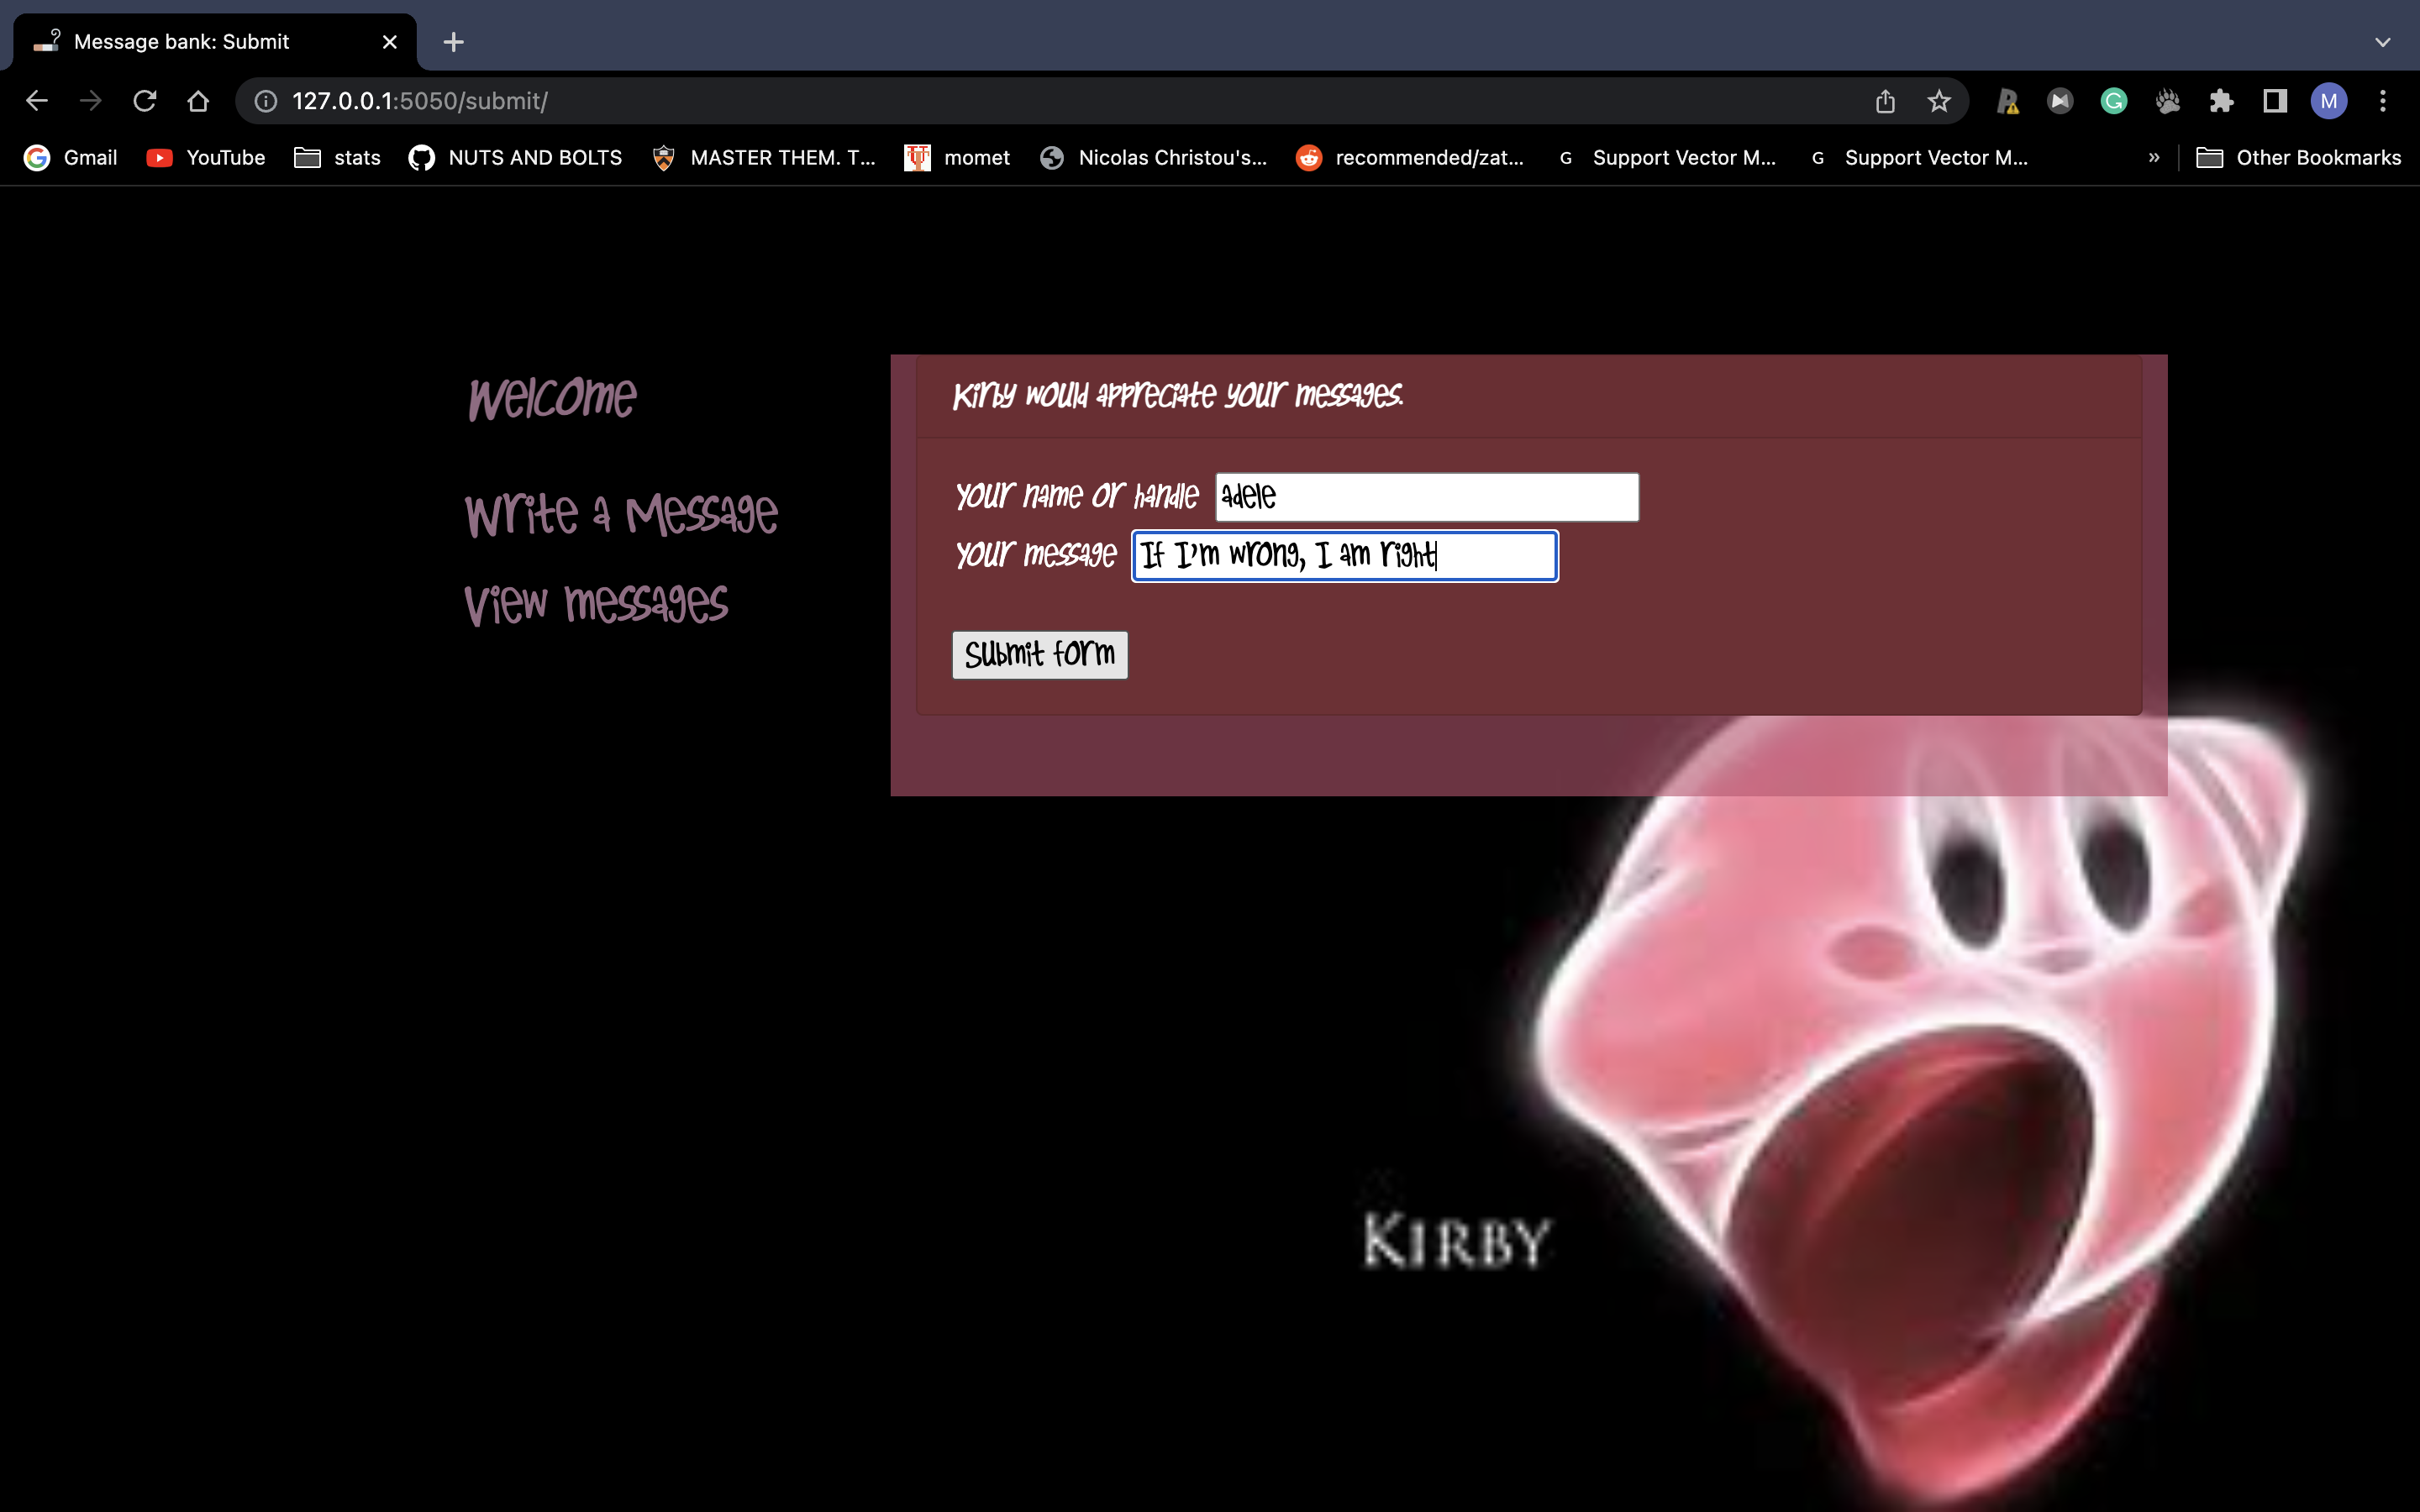

In [7]:

display.Image("static/pics/Screenshot 2023-02-14 at 2.01.03 AM.png")

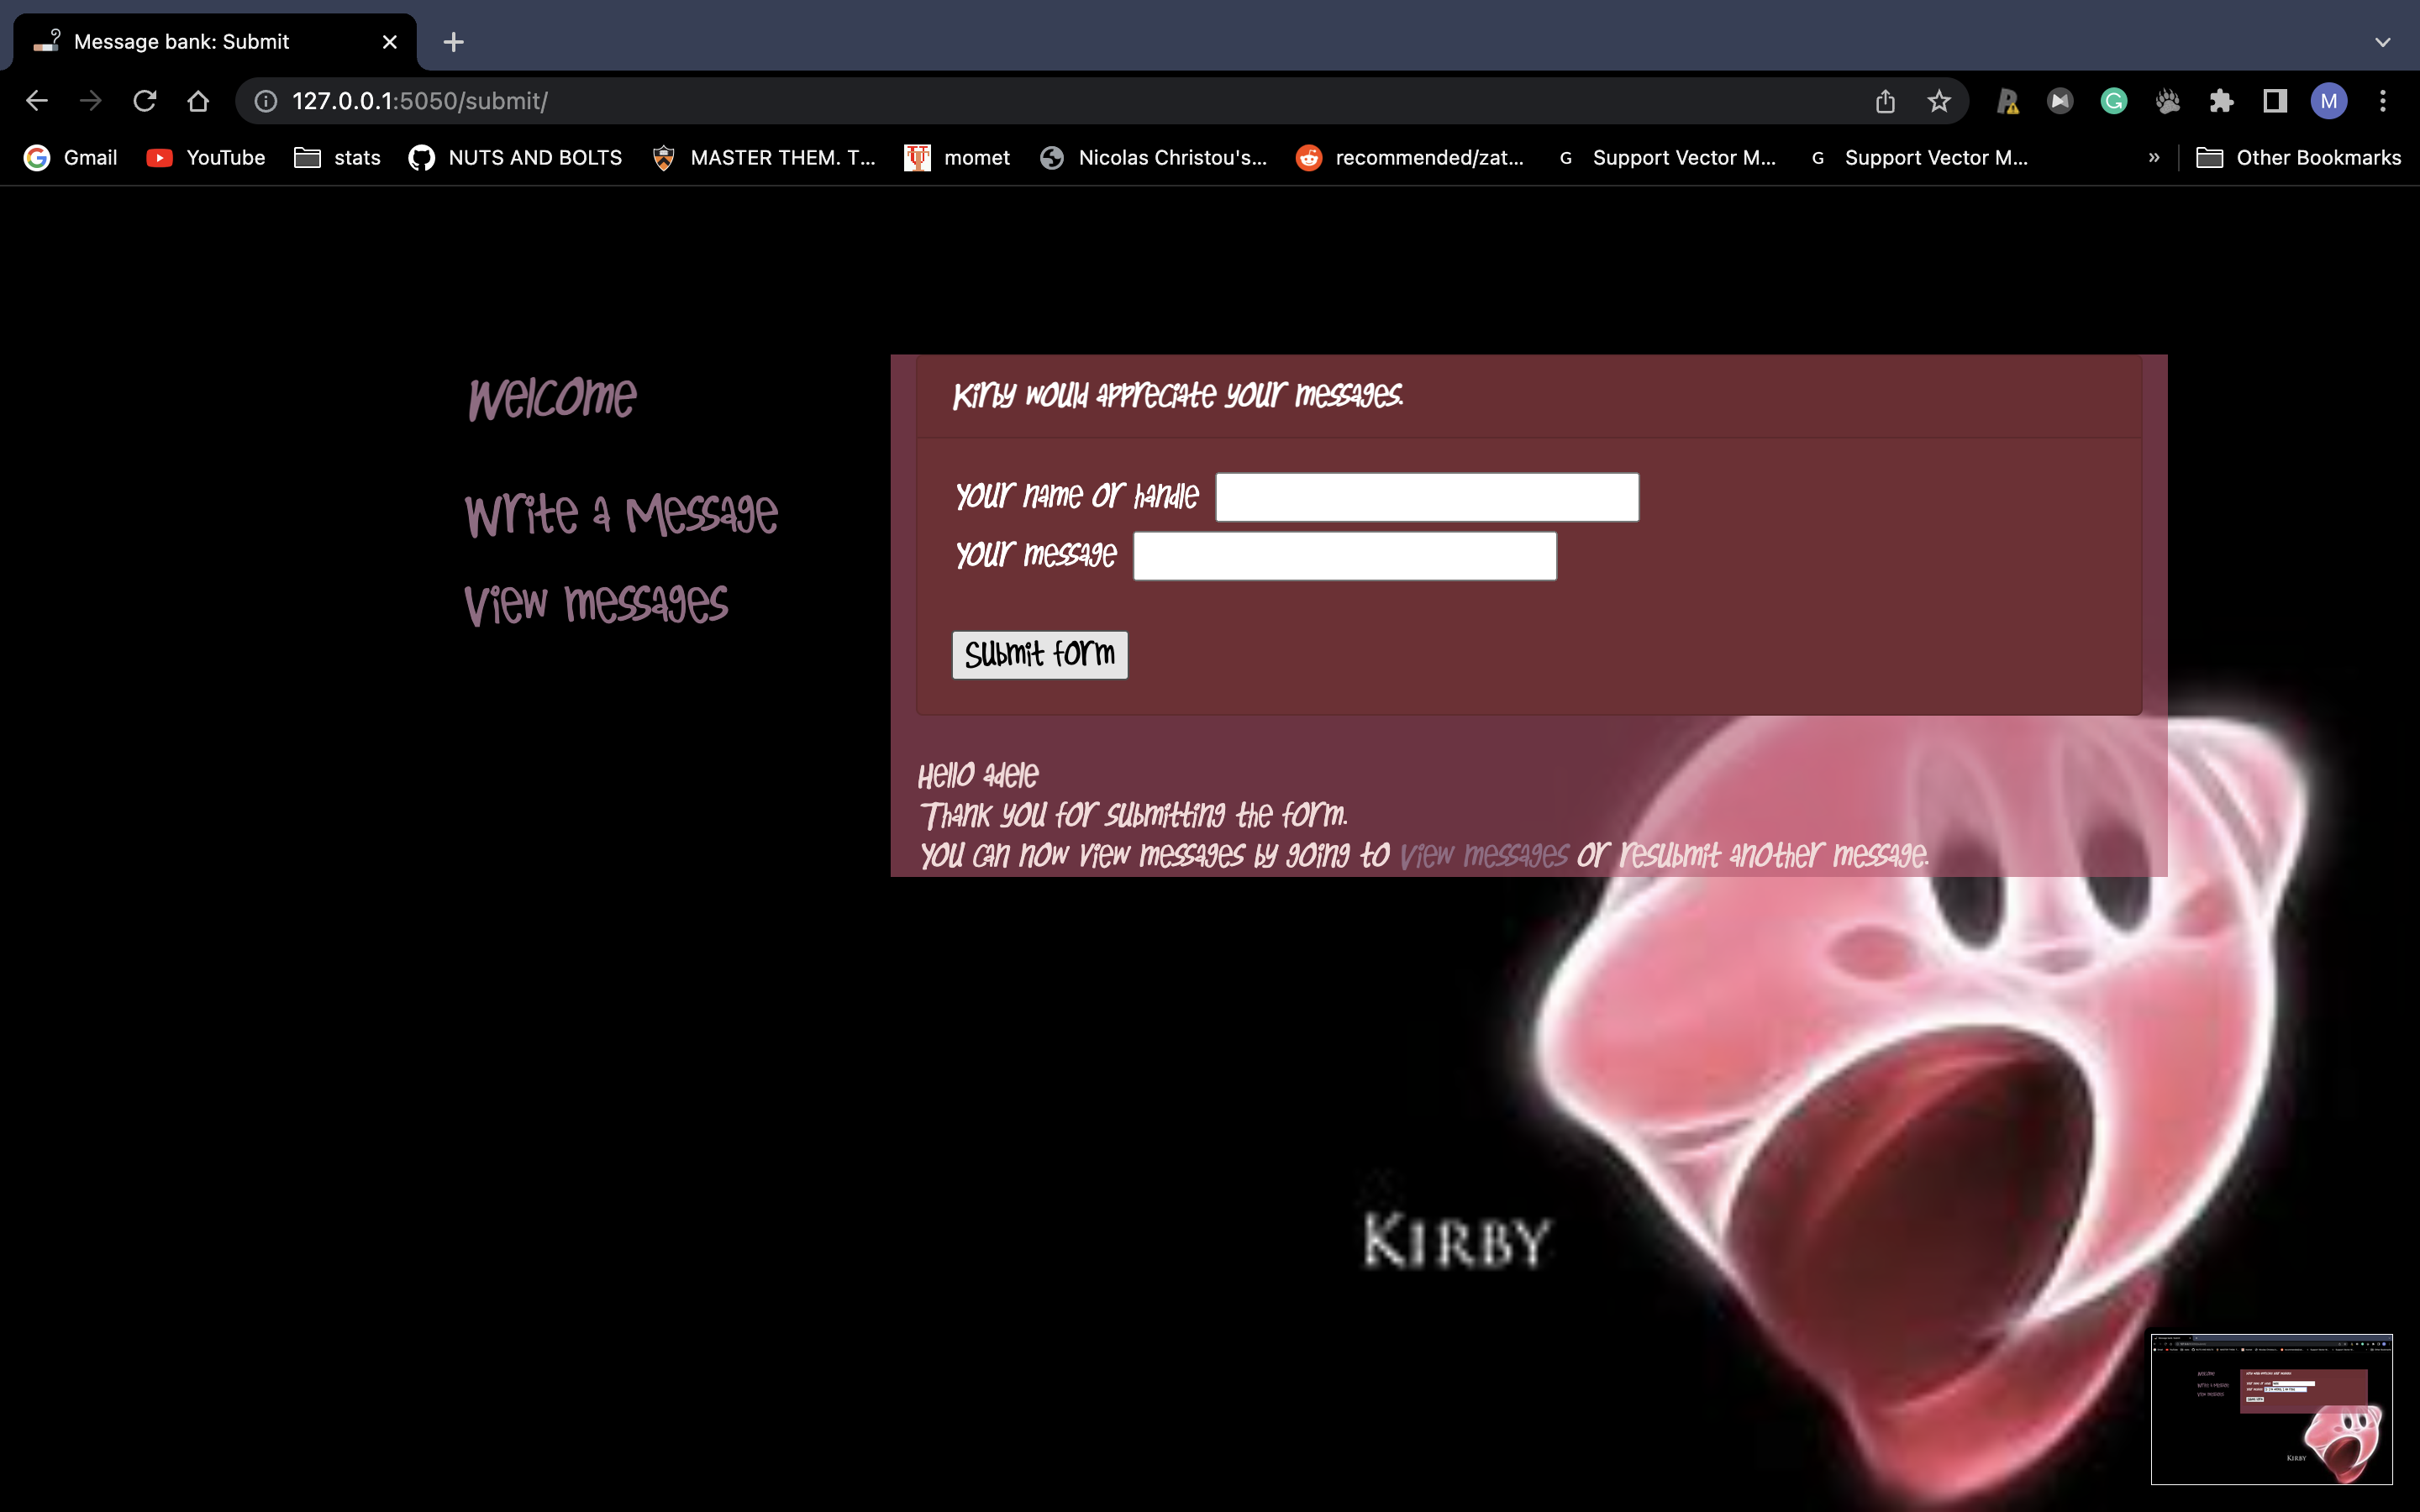

In [8]:
display.Image('static/pics/Screenshot 2023-02-14 at 2.01.07 AM.png')

Then, we define the view.html page, which is somewhat similar. 
```html

{% extends "base.html" %}

{% block title %}
    View
{% endblock %}

{% block main %}	

<div class="card">
    <div class="card-header">
      <i><b>Kirby has chosen some messages for you.</b>
    </div>
    <div class="card-body">
    <!-- messages is passed in to the render_template function when the request type is POST 
    the messages come from the random_messages function which returns a list of tuple, (handle, message) -->
        {% for m in messages %}
        <br>
        <!-- handle -->
        <p> From {{m[0]}} :</p>
        <!-- message -->
        <b>{{m[1]}}</b>
        <br>

        {%  endfor %}
    </div>
</div>
<br>
<!-- allow user to adjust the number of messages displahyed -->
<form method="post">
    <input type="range" id="n" name="n" min = "1" max = "9" step = "2" list="values">
    <label for="n">num. of messages</label>
    <datalist id="values">
    <option value="1" label="1"></option>
    <option value="3" label="3"></option>
    <option value="5" label="5"></option>
    <option value="7" label="7"></option>
    <option value="9" label="9"></option>
    </datalist>
    <br>
     <input type="submit" value="Change">
</form>
<br>
{% endblock %}

```

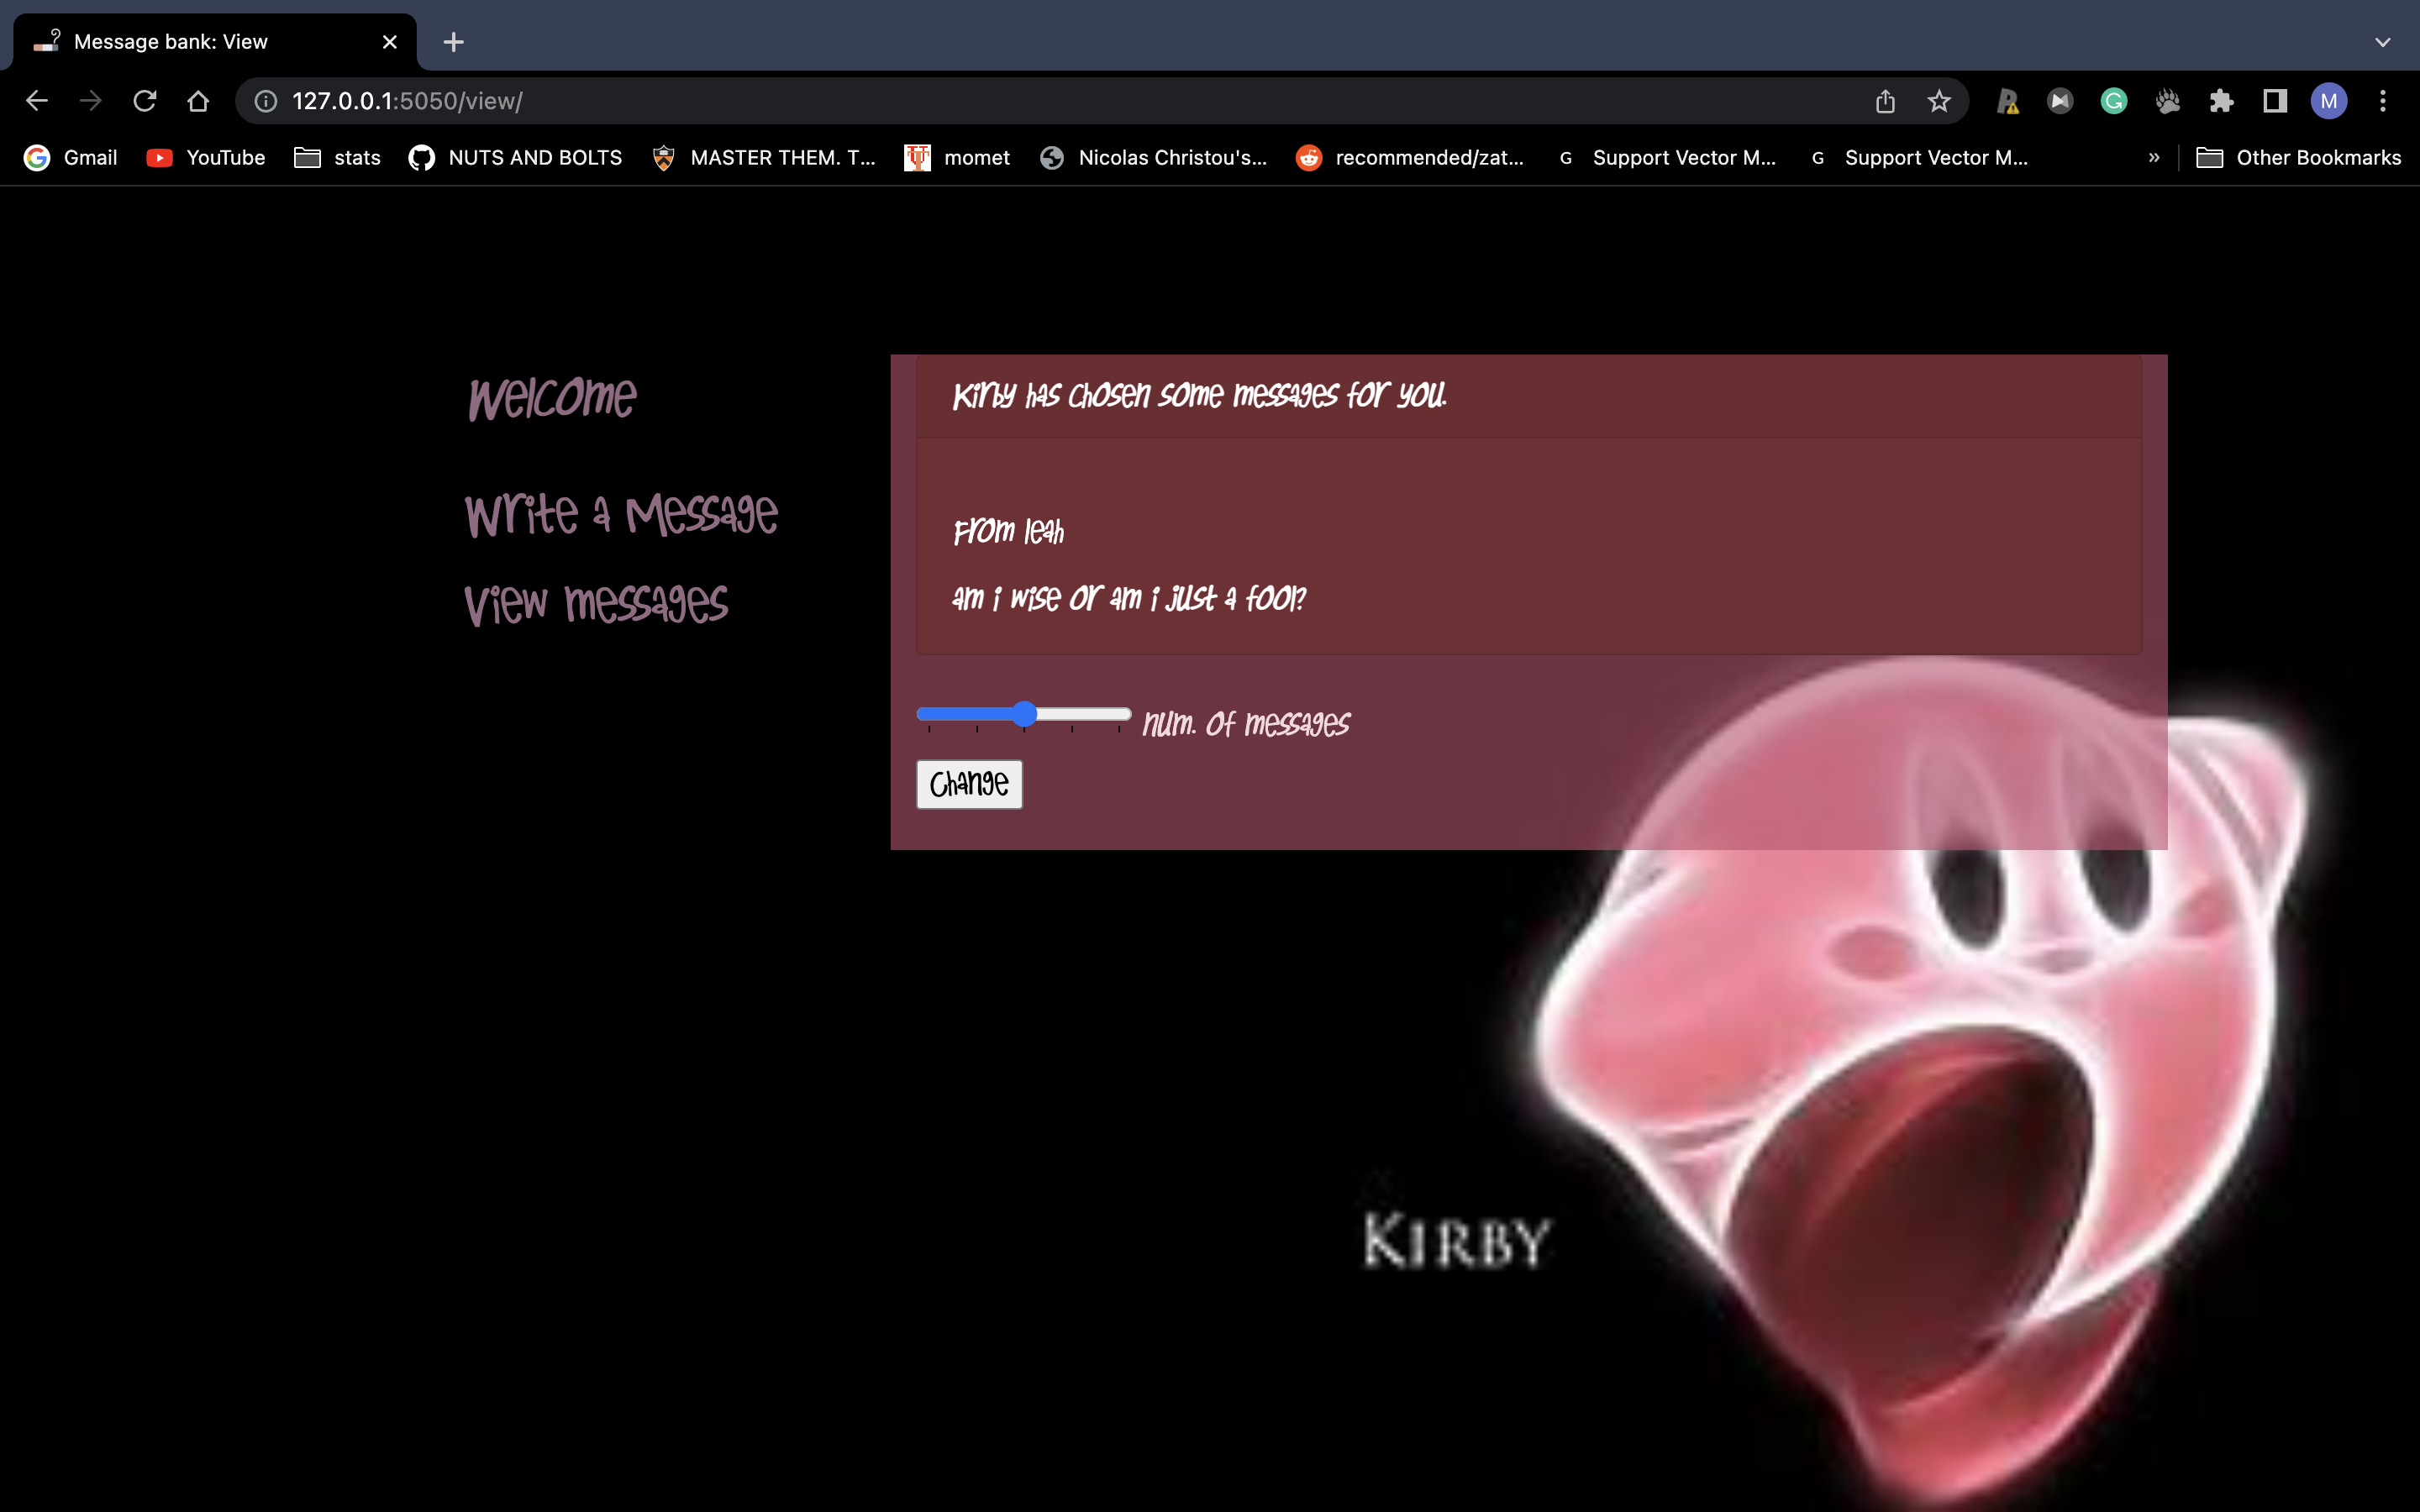

In [9]:
display.Image('static/pics/Screenshot 2023-02-14 at 2.01.14 AM.png')

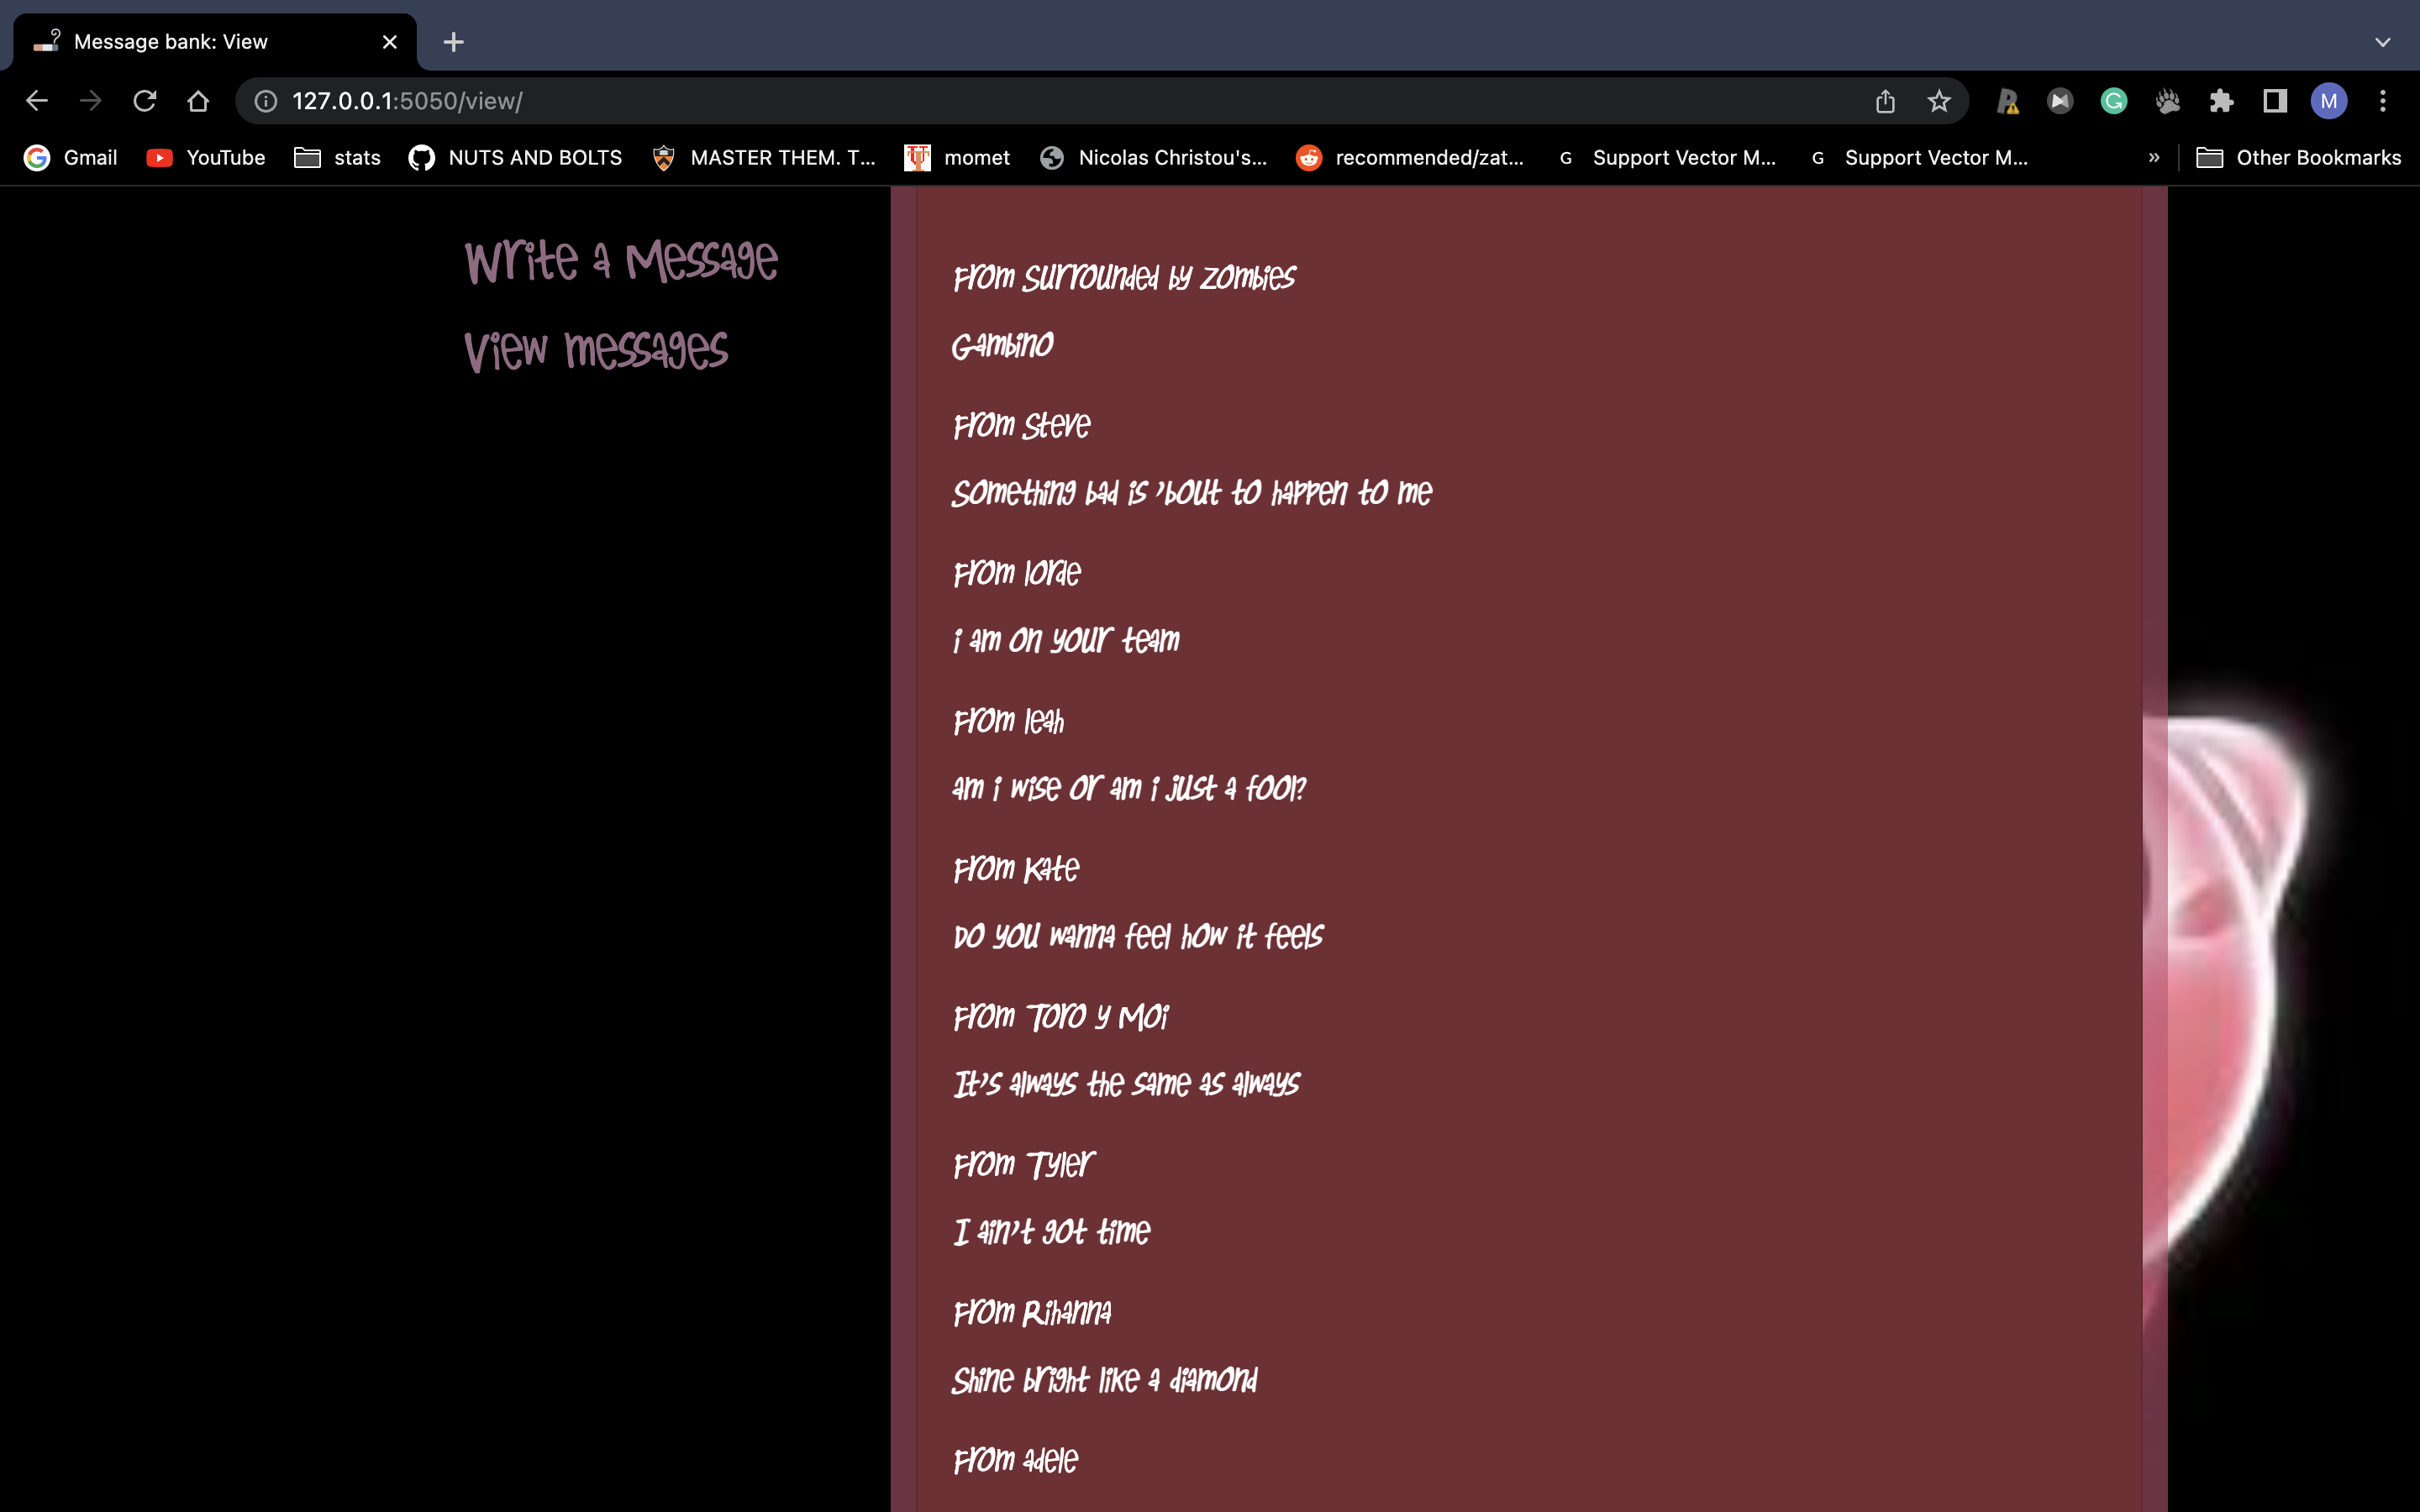

In [10]:
#more messages
display.Image("static/pics/Screenshot 2023-02-14 at 2.01.23 AM.png")

Finally, the home page.  
```html
{% extends "base.html" %}

{% block title %}
    Home
{% endblock %}

{% block main %}
	<div class="card">
		<div class="card-header">
		<i><b>Kirby thinks you are an amazing person and they are grateful that you exist.
			</div>
		<div class="card-body">
		<blockquote class="blockquote mb-0">
			<p> Vent. <br> Scream to the void. <br>Blow off some steam. </b></i>
			</br>
				</p>
			<footer class="blockquote-footer"></footer>
		</blockquote>
		</div>
	</div>
	<br>
	<h6>By: Marlene Lin</h6>
	<h6>ins: @m.lin01</h6>
	<br>

{% endblock %}

```

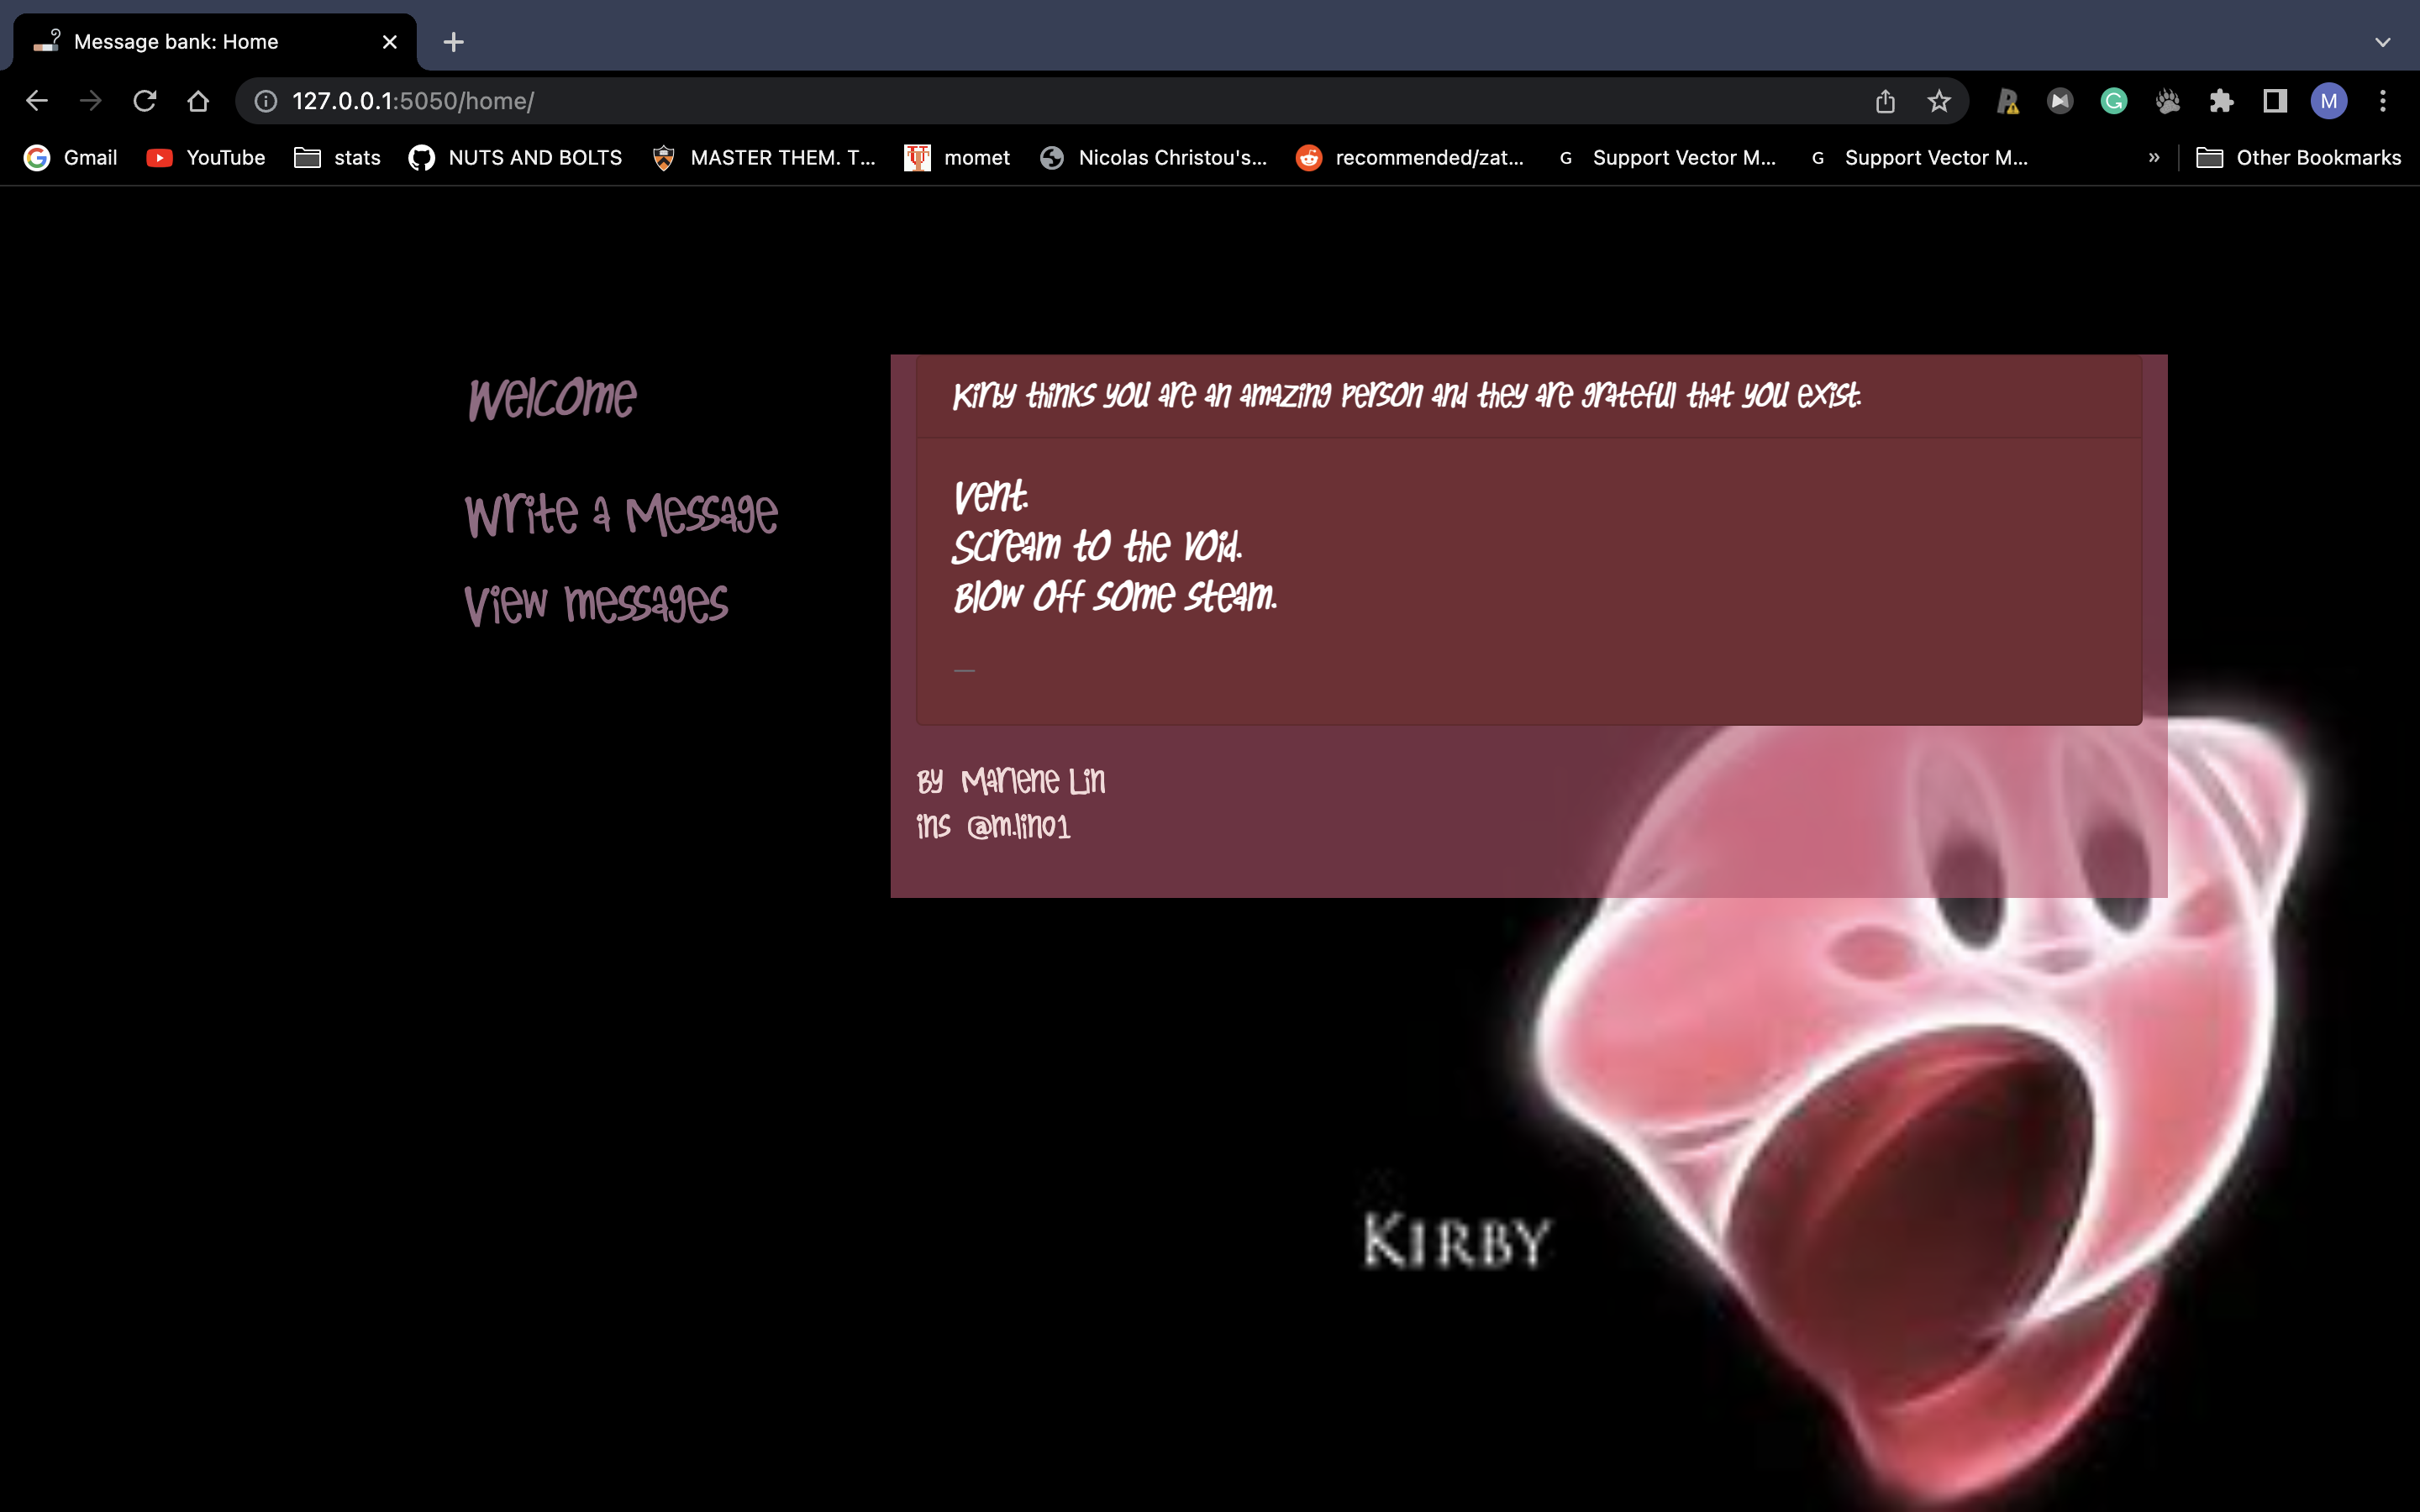

In [12]:

display.Image("static/pics/Screenshot 2023-02-14 at 2.00.15 AM.png")

## Additional stylings  
We create a folder called static to store page resources (background images), stylesheet, and page icon. I perform the following stylings to the message bank:  


```css
/* Using non-default font, 
notice this won't be good enough for cross-browser support*/
@font-face {
    font-family: 'Kirby-nnGM';
    src: url('/static/font/Kirby-nnGM.ttf');
}

/* customized body, card */
body {
 background: url('/static/pics/dark.jpeg') no-repeat center center fixed;
background-color: black;
  -webkit-background-size: cover;
  -moz-background-size: cover;
  background-size: cover;
  -o-background-size: cover;
  font-family: 'Kirby-nnGM';
  font-size: 14px;
}
h1 {
  font-size: 35px;
}

.header{
 height: 100px;
}
.card{
  background-color:rgb(116, 45, 51);
  color: white;
}
.maininfo {
  color: rgb(244, 217, 217);
  background-color: rgba(192, 79, 109, 0.6);
  font-size: 16px;
}

/* customized navigation bar */
.sidebar {font-size: 30px;}
.nav-link { color: #a46a6a;
font-size: 25px;}
.nav-link:hover { color: #fff;
    font-size: 25px;
}

/* customized position, use this as a class */
.center{
  margin-left: auto;
  margin-right: auto;
  width:70%;
}
/* customized bottons */
.btn-primary{
border-color: #fff;
}

.btn-outline-info:hover {
    color: #fff;
    background-color:#C75100;
    border-color: #C75100;
}

.btn-primary:hover{
    background-color: rgb(199, 81,0);
    border-color: white;
    color:black;
}
.btn:focus{
  border-color:white;
}

/* customized links */
a:link {
  color: rgb(199, 81,0);
  background-color: transparent;
  text-decoration: none;
}
a:visited {
  color: rgb(147, 106, 130);
  background-color: transparent;
  text-decoration: none;
}

/* customized forms */
.form-control{
  background-color: rgba(199,199,188,0.4);
  box-shadow: 0 1px 1px yellow inset, 0 0 8px red;
  outline: 0 none;
}
```



Honestly, I like Times better but just for the assignment's sake.

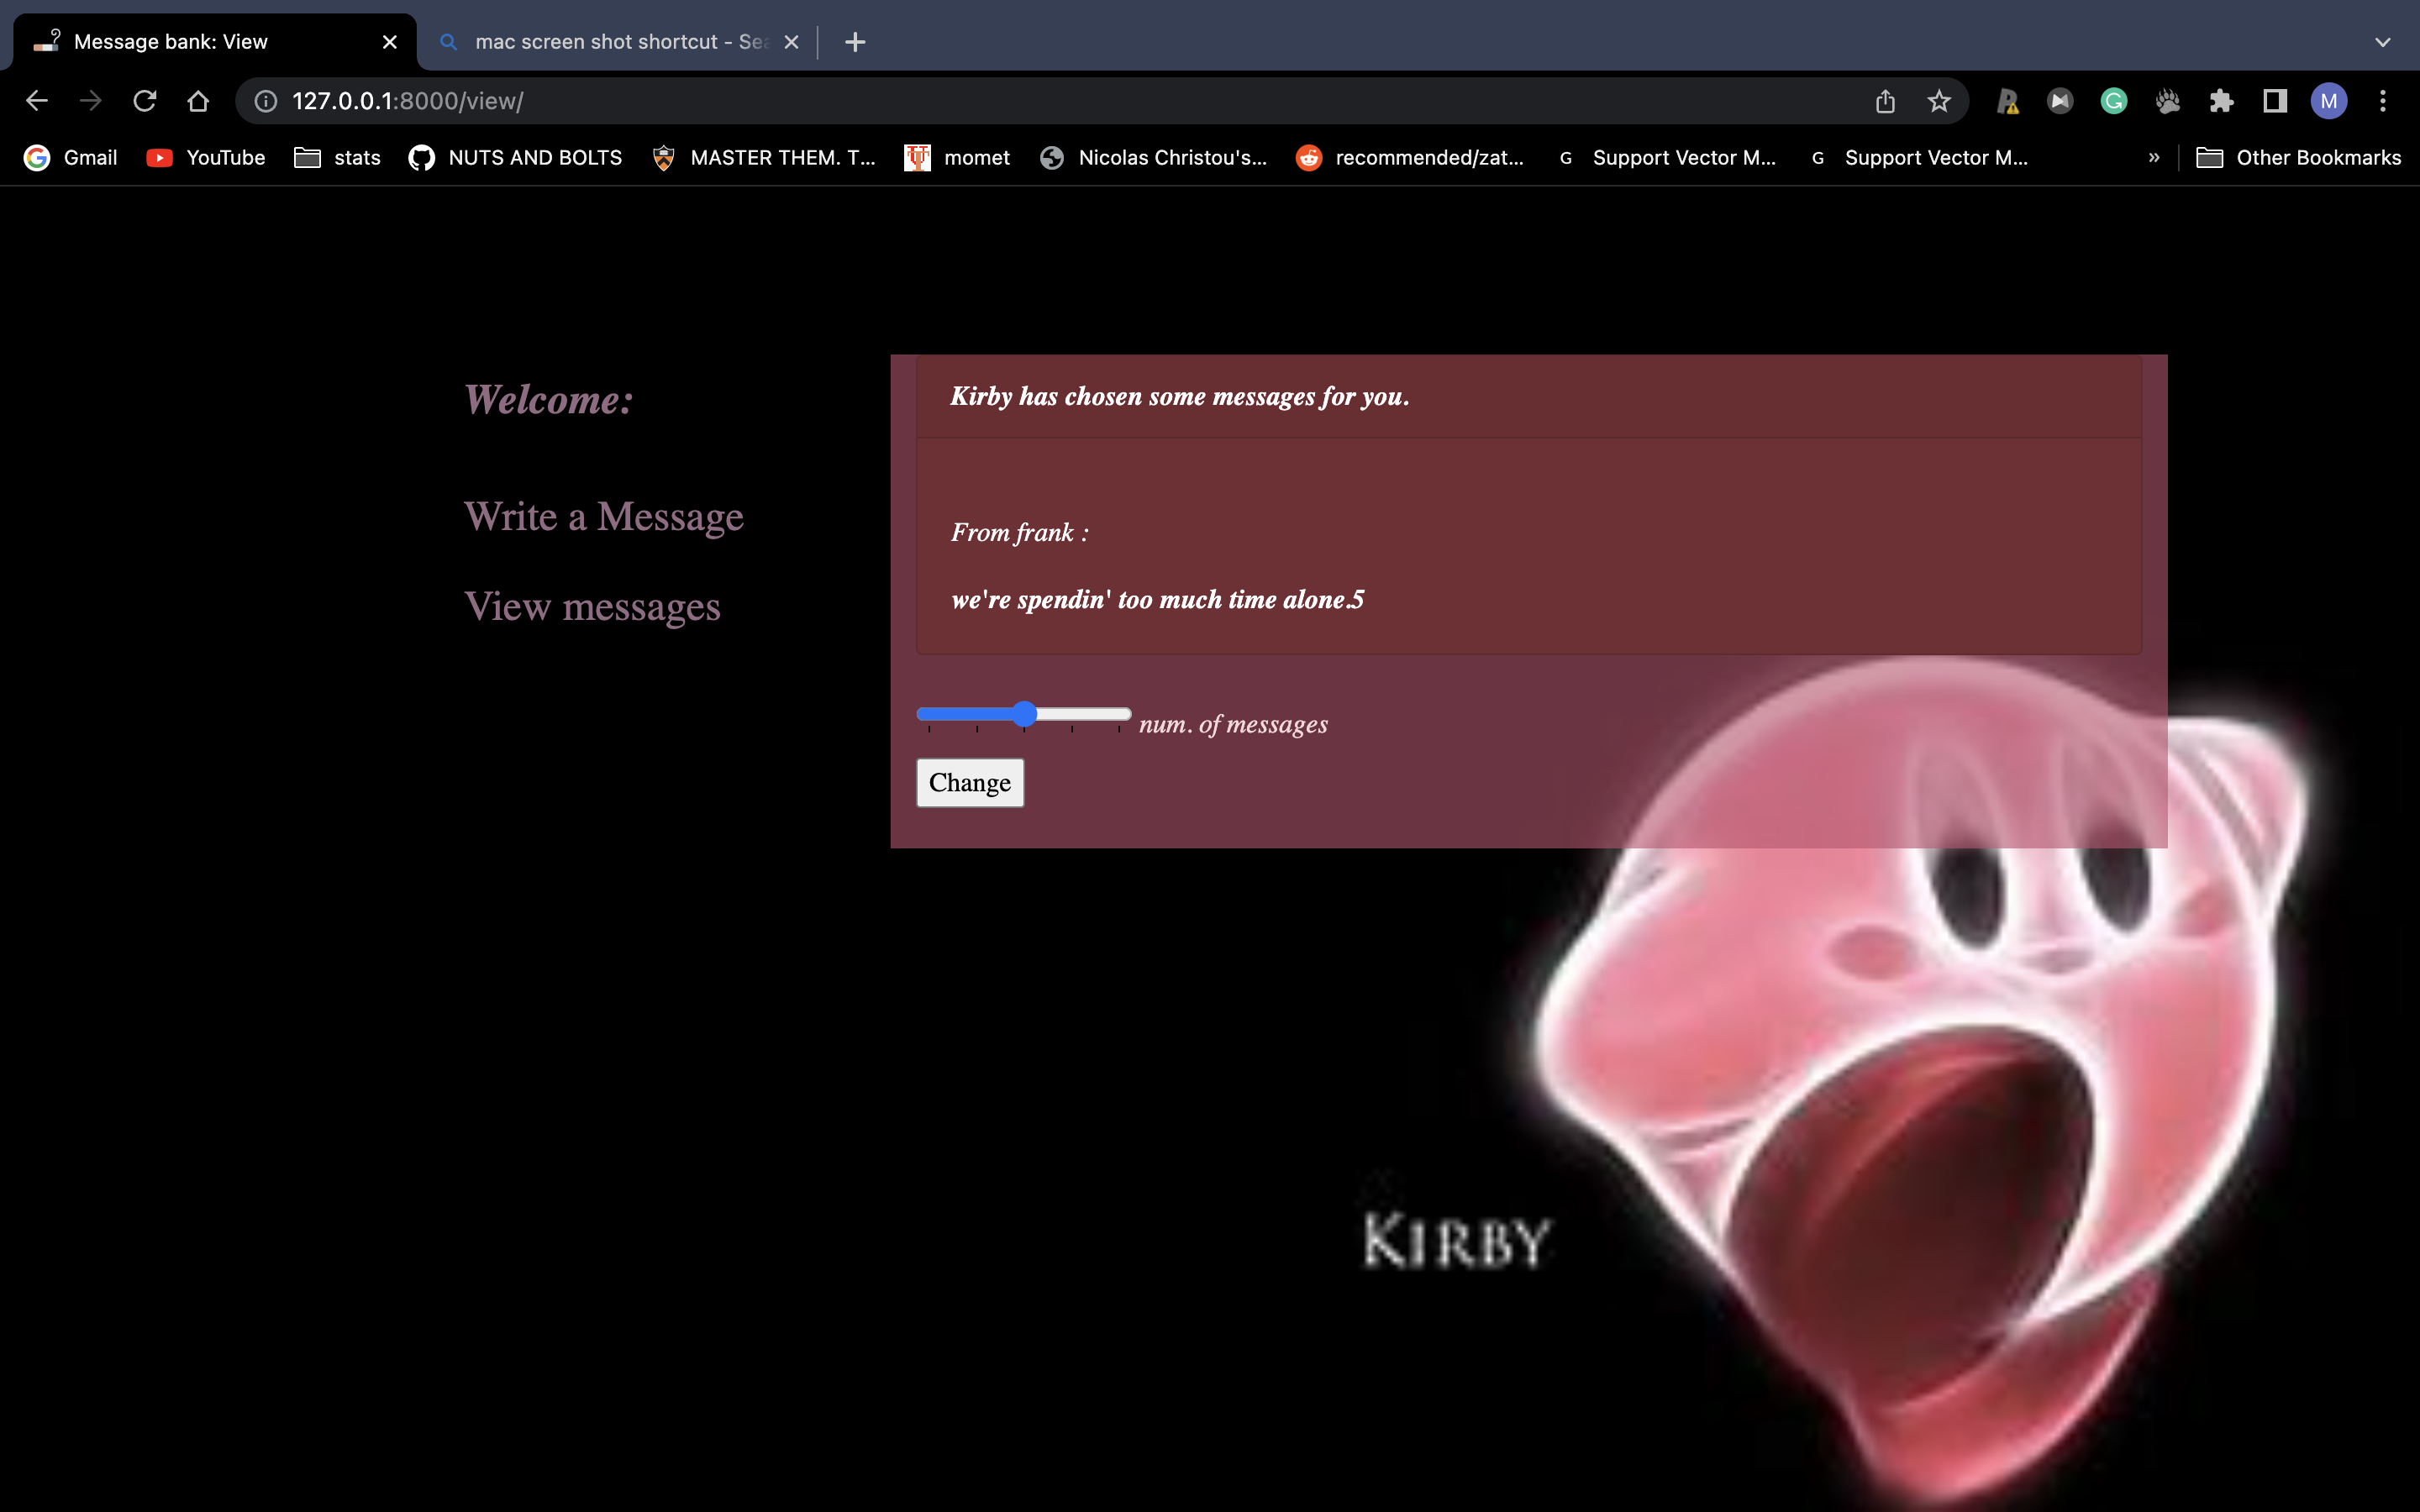

In [4]:

display.Image("static/pics/out.png")